## Time series analysis

emotions in tweets throughout: 
- the week
- the day

In [1]:
# import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# Load in data already separated into train and test data
data = pd.read_csv('../data/data.csv.zip', encoding='latin-1')

# rename columns
data.columns = ['sentiment', 'tweet_id', 'date', 'query', 'user', 'text']

# replace sentiment with their real values
data['sentiment'] = data['sentiment'].replace({0: 'negative', 2: 'neutral', 4: 'positive'})

# sort by datetime
sorted_data = data.sort_values(by='date')

# print out head
sorted_data.head()

,sentiment,tweet_id,date,query,user,text
8571,negative,1548274671,Fri Apr 17 20:30:31 PDT 2009,NO_QUERY,xoLovebug224,Working on my songg for aunt nan. kinda hard...
8572,negative,1548274782,Fri Apr 17 20:30:34 PDT 2009,NO_QUERY,Kerry_Baker,"can't sleep, it's 4.30am and i have to be up a..."
8573,negative,1548275152,Fri Apr 17 20:30:38 PDT 2009,NO_QUERY,glamorusindie81,wishing i could be at coachella this weekend ...
8574,negative,1548275569,Fri Apr 17 20:30:39 PDT 2009,NO_QUERY,WOnet,"Well, @LilWO was having a tough day/night. Wan..."
8575,negative,1548275799,Fri Apr 17 20:30:43 PDT 2009,NO_QUERY,jessicakornberg,taking some much needed naked time. too bad i...


### What day do people tweet the most

In [3]:
day_of_week = sorted_data.copy()

day_of_week  = day_of_week[['sentiment', 'date']]

day_of_week['date'] = pd.to_datetime(day_of_week['date'])

day_of_week['day'] = day_of_week['date'].dt.day_name()
day_of_week['time'] = day_of_week['date'].dt.time

# day_of_week = day_of_week.drop('date', axis = 1)

day_of_week.head()

/Users/nechamaborisute/anaconda3/envs/learn-env/lib/python3.8/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


,sentiment,date,day,time
8571,negative,2009-04-17 20:30:31,Friday,20:30:31
8572,negative,2009-04-17 20:30:34,Friday,20:30:34
8573,negative,2009-04-17 20:30:38,Friday,20:30:38
8574,negative,2009-04-17 20:30:39,Friday,20:30:39
8575,negative,2009-04-17 20:30:43,Friday,20:30:43


<AxesSubplot:xlabel='sentiment', ylabel='count'>

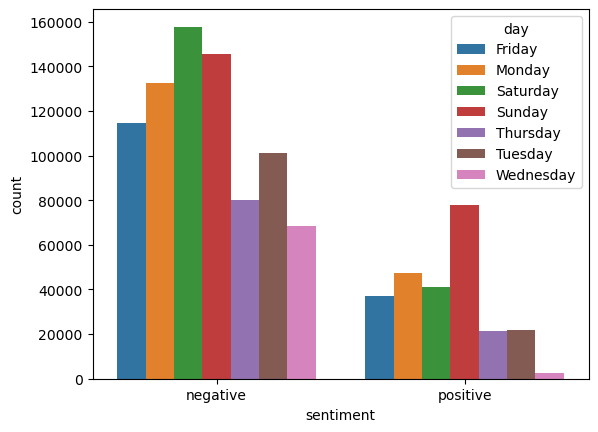

In [4]:
sns.countplot(data = day_of_week, x = 'sentiment', hue = 'day')

* Tweets are more negative in general.
* Negative tweets hit the roof on Saturday.
* Positive tweets are at the highest on Sundays
* On Wednesday people are DONE with positivity

### What time of day do people tweet 

In [ ]:
day_of_week.info()

In [8]:
# create hour column
day_of_week['hour'] = day_of_week['date'].dt.hour

# group by day, hour, sentiment
days = day_of_week.groupby(['day', 'hour', 'sentiment']).size().unstack()

In [52]:
def plot_day_sentiment(day_name, data=days):
    
    day = data.loc[f'{day_name}']

    day['total_count'] = day['positive'] + day['negative']

    fig, ax = plt.subplots()

    sns.scatterplot(data = day, x=day.index, y=day['total_count'], hue= day['negative'], size= day['positive'], ax = ax)
#     sns.scatterplot(data = sunday, x=sunday.index, y=sunday['total_count'], size= sunday['positive'], ax = ax)

    # Set labels and title
    plt.xlabel('Hour of the day')
    plt.ylabel('Sentiment count')
    plt.title(f'Sentiment Count by Hour: {day_name}')

    plt.legend()
    # Display the plot
    plt.show()

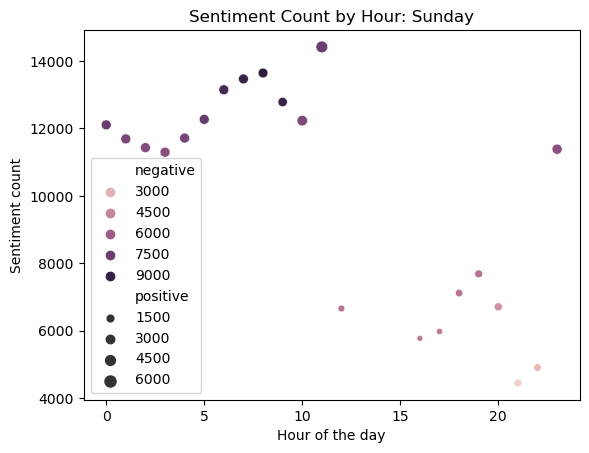

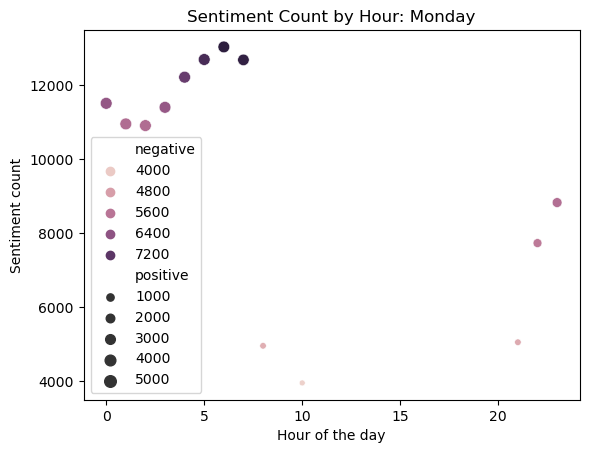

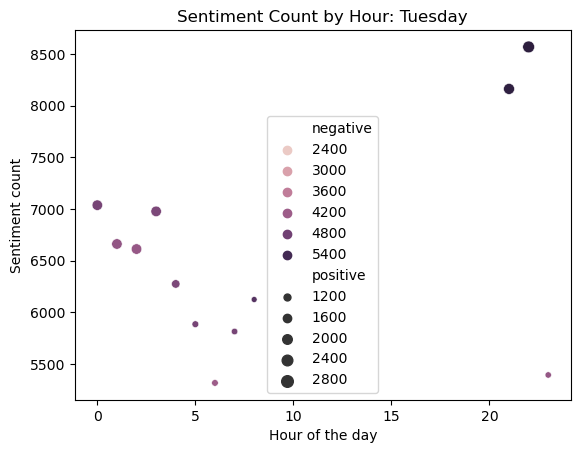

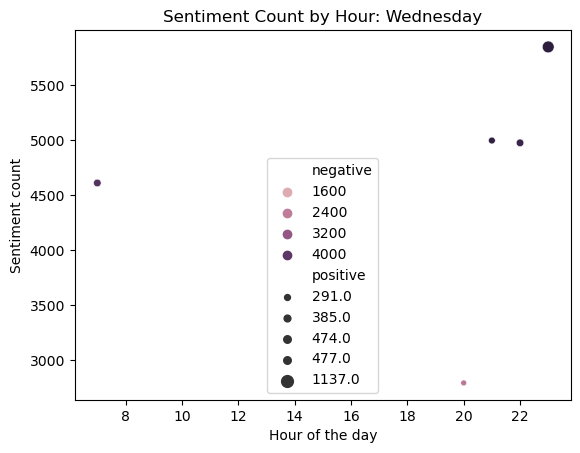

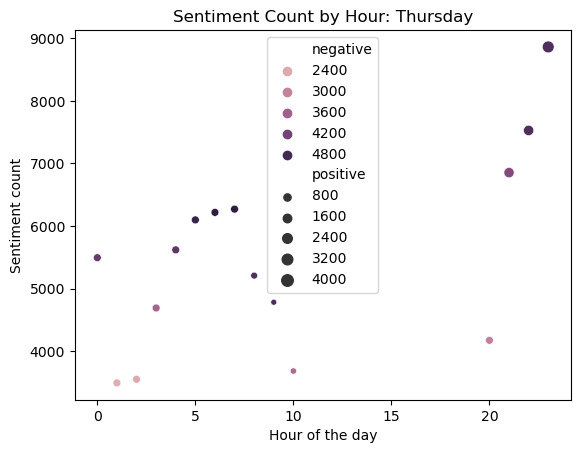

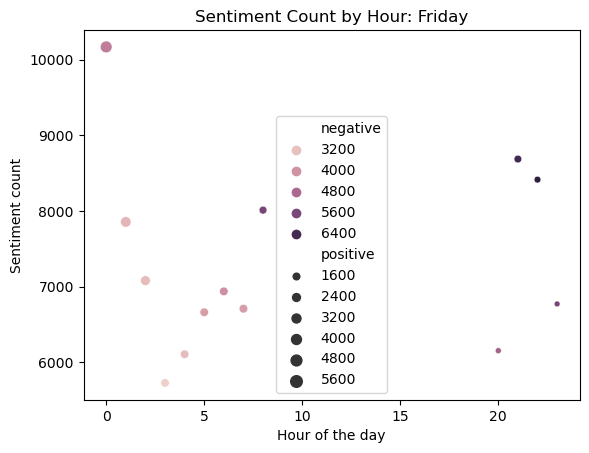

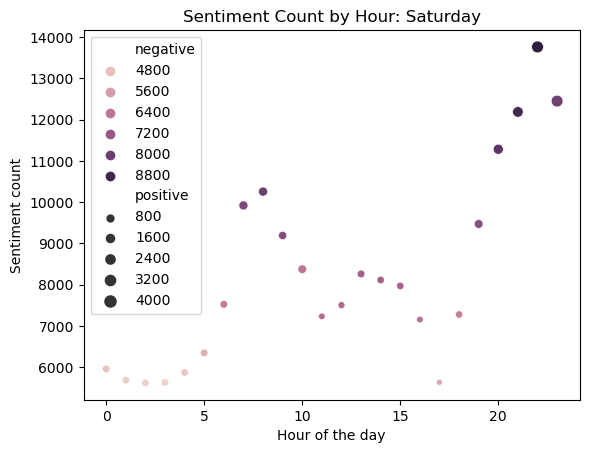

In [53]:
week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for day in week:
    plot_day_sentiment(day)

In [69]:
def plot_day_sentiment_bar(day_of_week, day_name, data=days):
    day = data.loc[f'{day_name}']
    day['total_count'] = day['positive'] + day['negative']

    # Create a stacked bar plot
    fig, ax = plt.subplots()
    ax.bar(day.index, day['positive'], label='Positive', color='green')
    ax.bar(day.index, day['negative'], bottom=day['positive'], label='Negative', color='red')

    # Set labels and title
    plt.xlabel('Hour of the day')
    plt.ylabel('Sentiment count')
    plt.title(f'Sentiment Count by Hour: {day_name}')
    
    plt.legend()
    # Display the plot
    plt.show()

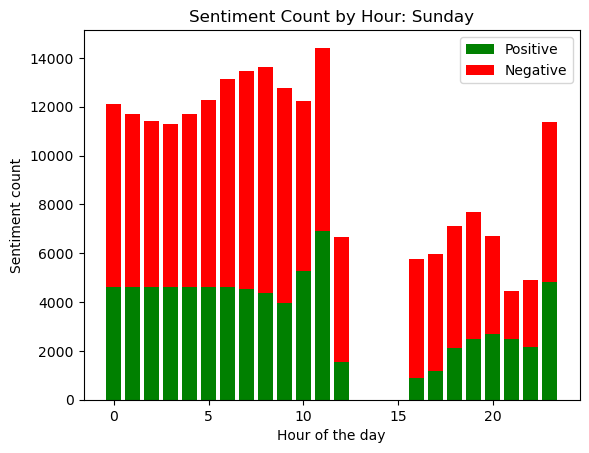

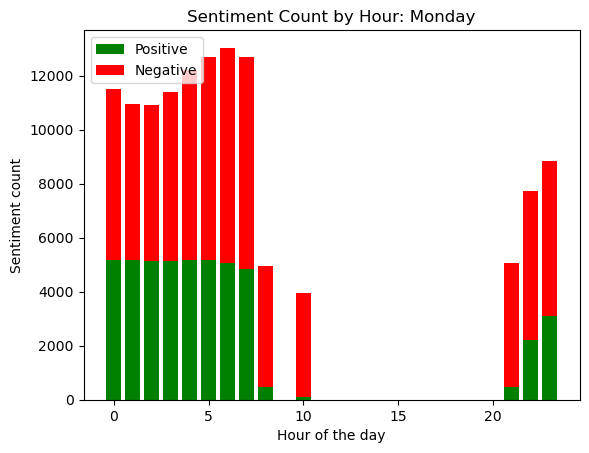

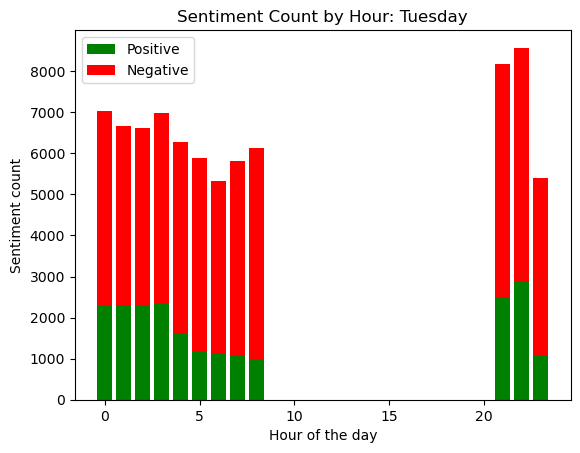

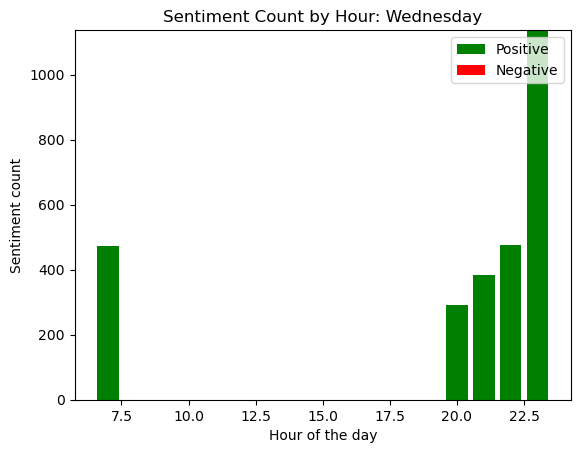

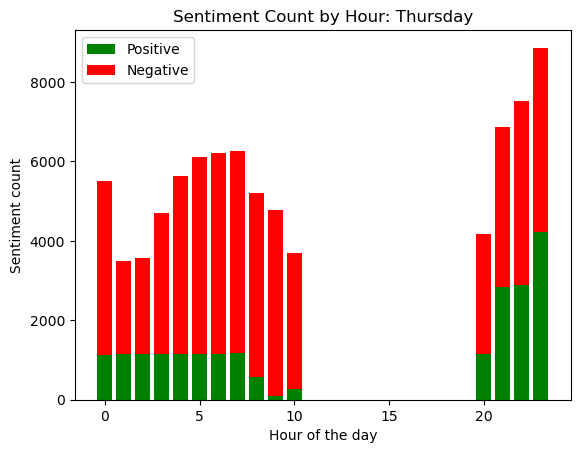

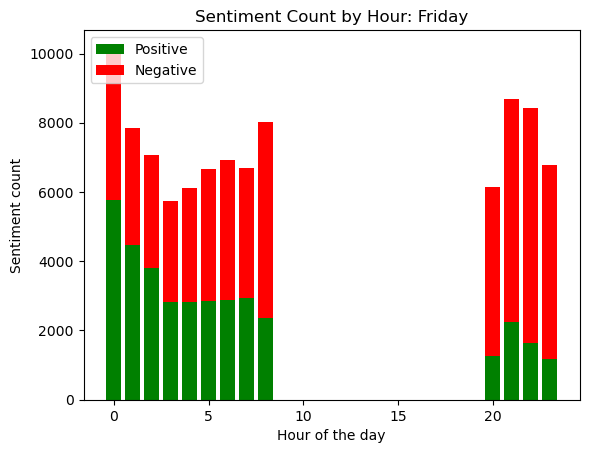

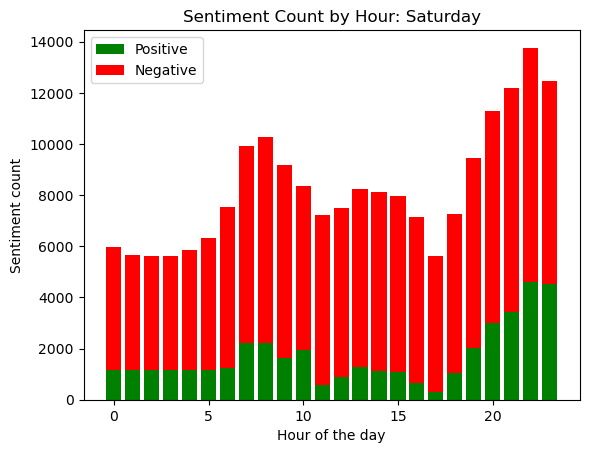

In [70]:
for day in week:
    plot_day_sentiment_bar(day_of_week, day)